In [1]:
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import NullFormatter
import matplotlib.cm as cm

import epicc_config as cfg

In [2]:
def adjust_spines2(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 5))
        else:
            spine.set_color('none')
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    else:
        ax.yaxis.set_ticks([])

    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
        ax.xaxis.set_ticks([])

In [3]:
#GEO INFO
geo_file = xr.open_dataset(cfg.geofile_ref)
lm_is=geo_file.LANDMASK.squeeze()
lm_is=lm_is.rename({'west_east':'x','south_north':'y'})



In [4]:
tsamples = np.asarray([1,6,36,72,144])
colors=['indigo','lightseagreen', 'yellowgreen','orange','crimson']#indigo removed
colors=['#003f5c','#58508d','#bc5090','#ff6361','#ffa600']

In [5]:
#LOADING DATA
#####################################################################
#####################################################################

wrun_pre = cfg.wrf_runs[0]
wrun_fut = wrun_pre.replace("ERA5","ERA5_CMIP6anom")

fin_pre_land = xr.open_dataset(f'{cfg.path_in}/{wrun_pre}/hist2d_IFD_spell_hist2d_2013-2020_land_sum.nc')
fin_fut_land = xr.open_dataset(f'{cfg.path_in}/{wrun_fut}/hist2d_IFD_spell_hist2d_2013-2020_land_sum.nc')

# I_bins_intensity=np.array(list(range(1,30,1))+list(range(30,100,2))+list(range(100,255,5))+[1000])
# I_bins_spell = np.asarray(list(range(1,6,1)) + list(range(6,144,6)) #+ list(range(144,576,144))) 

I_bins_spell = np.asarray(list(range(1,6,1)) + list(range(6,576,6)))
I_bins_intensity=np.array(list(range(1,251,2))+[1000])


In [100]:
fin_pre_land['spell_bin'] = I_bins_spell
fin_fut_land['spell_bin'] = I_bins_spell
intensity = fin_pre_land['intensity_bin'].values

In [59]:
fpre = fin_pre_land.rolling(intensity_bin=10,center=True).mean()
ffut = fin_fut_land.rolling(intensity_bin=10,center=True).mean()
frel = (ffut - fpre)*100/fpre
fdif = ffut - fpre

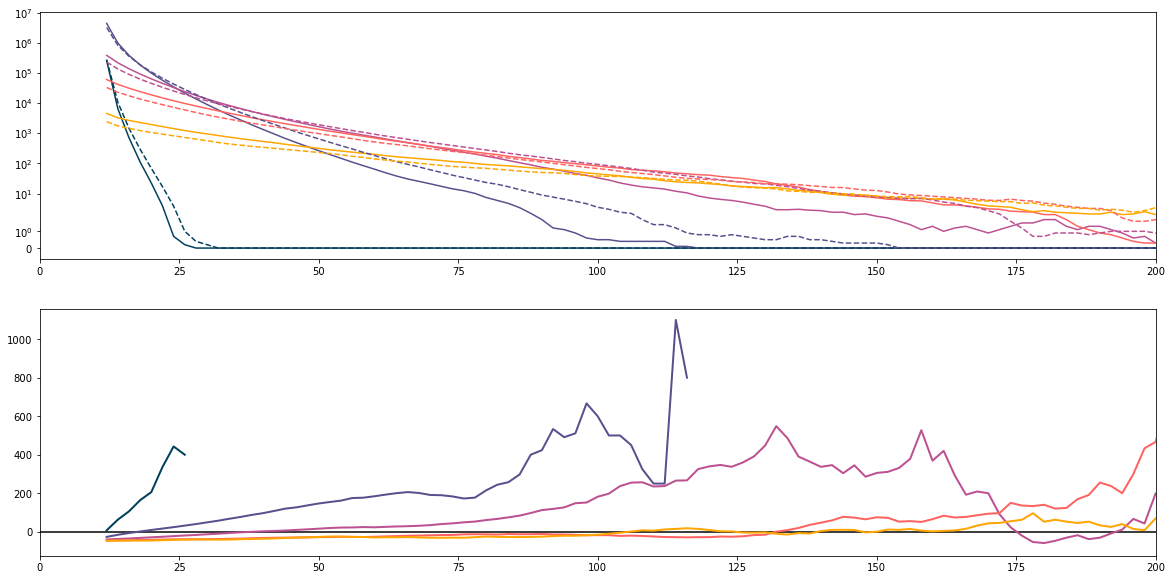

In [60]:
fig = plt.figure(figsize=(20, 10))
ax1=fig.add_subplot(2,1,1)
ax1.set_xlim(0,200)
ax1.set_yscale('symlog')

for nt, tsamp in enumerate(tsamples):
    ax1.plot(intensity ,fpre.sel(spell_bin=tsamp).histogram_spell_intensity.values,c=colors[nt])

for nt, tsamp in enumerate(tsamples):
    ax1.plot(intensity ,ffut.sel(spell_bin=tsamp).histogram_spell_intensity.values,c=colors[nt],linestyle='--')

ax2=fig.add_subplot(2,1,2)
ax2.set_xlim(0,200)

ax2.axhline(0,c='k')
#ax2.set_yscale('symlog')
for nt, tsamp in enumerate(tsamples):
    ax2.plot(intensity ,frel.sel(spell_bin=tsamp).histogram_spell_intensity.values,c=colors[nt],linewidth=2)




In [6]:
resamples = np.asarray([10,60,360,720,1440])
colors=['indigo','lightseagreen', 'yellowgreen','orange','crimson']#indigo removed
colors=['#003f5c','#58508d','#bc5090','#ff6361','#ffa600']

In [7]:
#LOADING DATA
#####################################################################
#####################################################################

wrun_pre = cfg.wrf_runs[0]
wrun_fut = wrun_pre.replace("ERA5","ERA5_CMIP6anom")

fpre = xr.open_dataset(f'{cfg.path_in}/{wrun_pre}/hist2d_resample_time_IFD_2013-2020_land_sum_WME.nc')
ffut = xr.open_dataset(f'{cfg.path_in}/{wrun_fut}/hist2d_resample_time_IFD_2013-2020_land_sum_WME.nc')

intensity = fpre['Ibins'].values

In [17]:
fpre

<xarray.Dataset>
Dimensions:  (RSmins: 10, Ibins: 200)
Coordinates:
  * Ibins    (Ibins) float64 2.5 7.5 12.5 17.5 22.5 ... 982.5 987.5 992.5 997.5
  * RSmins   (RSmins) int64 10 20 30 60 120 180 360 480 720 1440
Data variables:
    FRQ      (RSmins, Ibins) float64 1.073e+11 1.209e+07 6.535e+05 ... 0.0 0.0
    lat      float32 1.093e+07
    lon      float32 1.066e+06

In [22]:
fpre = fpre.rolling(Ibins=5,center=True).mean()*fpre.Ibins
ffut = ffut.rolling(Ibins=5,center=True).mean()*ffut.Ibins

In [23]:
frel = (ffut - fpre)*100/fpre
fdif = ffut - fpre

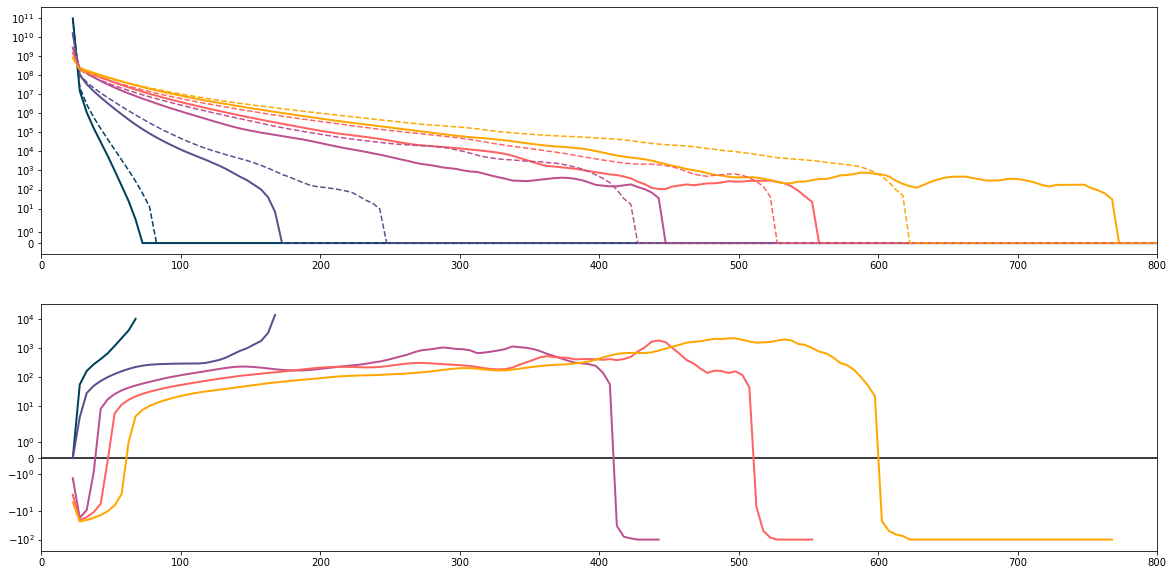

In [27]:
fig = plt.figure(figsize=(20, 10))
ax1=fig.add_subplot(2,1,1)
ax1.set_xlim(0,800)
ax1.set_yscale('symlog')

for nt, tsamp in enumerate(resamples):
    ax1.plot(intensity ,fpre.sel(RSmins=tsamp).FRQ.values,c=colors[nt],linewidth=2)

for nt, tsamp in enumerate(resamples):
    ax1.plot(intensity ,ffut.sel(RSmins=tsamp).FRQ.values,c=colors[nt],linestyle='--')

ax2=fig.add_subplot(2,1,2)
ax2.set_xlim(0,800)

ax2.axhline(0,c='k')
ax2.set_yscale('symlog')
for nt, tsamp in enumerate(resamples):
    ax2.plot(intensity ,frel.sel(RSmins=tsamp).FRQ.values,c=colors[nt],linewidth=2)



